In [2]:
# Load data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Must set path to the actual location of the data on local google drive
path = '/content/drive/MyDrive/DSBA6156_Project_Shared/Diabetes archive/diabetes_binary_health_indicators_BRFSS2015.csv'
data = pd.read_csv(path,sep=",",)
drive.flush_and_unmount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# /Users/rishipal/SynologyDrive/Drive/Personal develop/UNCC Health Informatics/UNCC_Courses/08_Fall 2023/DSBA6156/Group Project/DSBA6156_Project_Shared/Diabetes archive

In [5]:
# path = '/Users/rishipal/SynologyDrive/Drive/Personal develop/UNCC Health Informatics/UNCC_Courses/08_Fall 2023/DSBA6156/Group Project/DSBA6156_Project_Shared/Diabetes archive/diabetes_binary_health_indicators_BRFSS2015.csv'

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, precision_recall_fscore_support
from sklearn.metrics import average_precision_score, classification_report
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [7]:
# Load data
#df = pd.read_csv('/Users/rishipal/SynologyDrive/Drive/Personal develop/UNCC Health Informatics/UNCC_Courses/08_Fall 2023/DSBA6156/Group Project/DSBA6156_Project_Shared/Diabetes archive/diabetes_binary_health_indicators_BRFSS2015.csv')

In [8]:
# Split data into X (predictors) and y (target)
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242, stratify=y)

In [10]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Use LinearSVC from SVM
svc = LinearSVC(dual=False, max_iter=10000, tol=1e-5, verbose=1,)

# Use Radial kernel SVM
#svc = SVC()

In [12]:
pipeline = Pipeline([
    ('classifier', svc)
])

In [13]:
import warnings
warnings.filterwarnings("ignore")

# Grid search hyperparameters
## 'classifier__gamma':np.logspace(-3, 2, 6)

param_grid = {'classifier__C': np.logspace(-3, 4, 10)
              #,'classifier__gamma': np.logspace(-4, 1, 5)
              }
grid = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True, scoring='roc_auc')
grid.fit(X_train, y_train)
print(f"Best mean cross-validation score: {grid.best_score_:.3f}")
print(f"Best parameters: {grid.best_params_}")

# Calculate ROC AUC score on test data using decision function for SVC
best_svc = grid.best_estimator_
y_pred_test1 = best_svc.decision_function(X_test)
roc_auc_test1 = roc_auc_score(y_test, y_pred_test1)
print(f"ROC AUC of Test Data: {roc_auc_test1:.3f}")

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Best mean cross-validation score: 0.822
Best parameters: {'classifier__C': 1668.100537200059}
ROC AUC of Test Data: 0.821


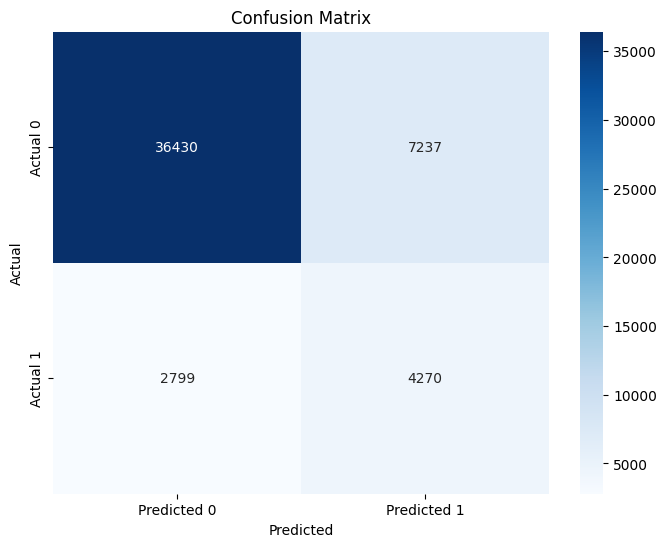

In [14]:
best_svc = grid.best_estimator_
y_pred = best_svc.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Change Threshold
threshold = -0.5
y_decision_function = (best_svc.decision_function(X_test) > threshold).astype('float')
conf_matrix = confusion_matrix(y_test, y_decision_function)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_decision_function)
precision = precision_score(y_test, y_decision_function)
recall = recall_score(y_test, y_decision_function)
f1 = f1_score(y_test, y_decision_function)
#remember to use separate calculation for ranking metrics
y_pred_test2 = best_svc.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_pred_test2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.8021917376222012
Precision: 0.37107847397236465
Recall: 0.6040458339227613
F1 score: 0.45973298880275626
ROC AUC: 0.821129405388146


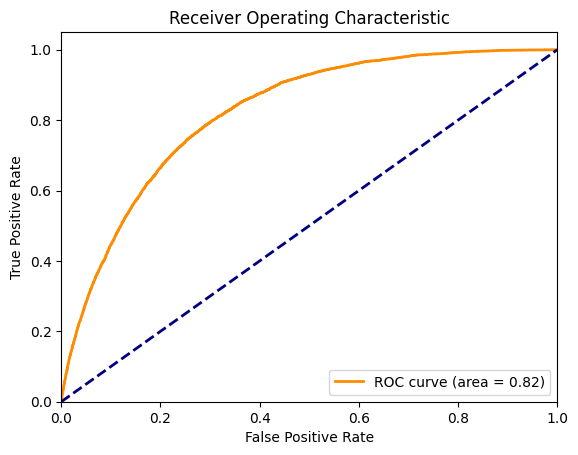

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test2)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

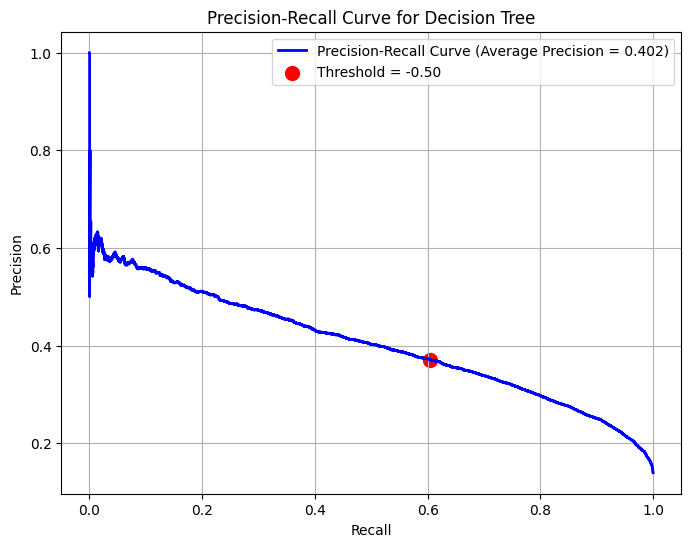

In [18]:
# Generate Precision Recall and Average Precision

# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test2)

# Calculate Average Precision
average_precision = average_precision_score(y_test, y_pred_test2)

# Plot the Precision-Recall Curve with Average Precision in the Legend
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (Average Precision = {average_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')

# (Added by Xavier) Add a circle at the threshold
# threshold = 0.25
# Find the index of the closest threshold value in the array
closest_threshold_index = np.argmin(np.abs(thresholds - threshold))
# Mark the threshold with a circle
plt.scatter(recall[closest_threshold_index], precision[closest_threshold_index], c='r', marker='o', s=100, label=f'Threshold = {thresholds[closest_threshold_index]:.2f}')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()